In [1]:
import pandas as pd
import numpy as np

#Load flight data
flights_1 = pd.read_csv('flights.csv', header=0, sep=',')

#load airline data
airlines = pd.read_csv('airlines.csv', header=0, sep=',')


#merge airline data to flight data
flights_2 = pd.merge(flights_1, 
                     airlines, 
                     how='left', 
                     left_on='AIRLINE',
                     right_on='IATA_CODE')


#load airport data
airports = pd.read_csv('airports.csv', header=0, sep=',')

#merge airport data to flight data
flights_3 = pd.merge(flights_2, 
                     airports, 
                     how='left', 
                     left_on='ORIGIN_AIRPORT', 
                     right_on='IATA_CODE')


flights_4 = pd.merge(flights_3, 
                     airports, 
                     how='left', 
                     left_on='DESTINATION_AIRPORT', 
                     right_on='IATA_CODE', 
                     suffixes=('_ORIGIN', '_DESTINATION'))

#drop duplicate columns from merging
flights = flights_4.drop(['IATA_CODE_y','IATA_CODE_x','IATA_CODE'],axis = 1)

#rename columns changed in merging
flights = flights.rename(columns = {'AIRLINE_x':'AIRLINE_CODE', 'AIRLINE_y':'AIRLINE_NAME'})

#replace NaN with 0
flights = flights.fillna(0)

flights.head(20)


/Users/hollisnymark/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,AIRPORT_DESTINATION,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,CA,USA,37.61900,-122.37484,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,NV,USA,36.08036,-115.15233,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,CA,USA,33.94254,-118.40807,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,CA,USA,37.61900,-122.37484,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,NV,USA,36.08036,-115.15233,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694


In [2]:
#Create name friendly columns
DayOfWeek = {1: 'Monday', 
             2: 'Tuesday', 
             3: 'Wednesday', 
             4: 'Thursday', 
             5: 'Friday', 
             6: 'Saturday', 
             7: 'Sunday'}

MonthName = {1: 'January', 
              2: 'February', 
              3: 'March', 
              4: 'April', 
              5: 'May', 
              6: 'June', 
              7: 'July', 
              8: 'August', 
              9: 'September', 
              10: 'October', 
              11: 'November', 
              12: 'December'}

CancellationReason = {'A': 'Airline/Carrier',
                      'B': 'Weather',
                      'C': 'National Air System',
                      'D': 'Security'}

flights['Day_Of_Week'] = flights['DAY_OF_WEEK'].map(lambda x: DayOfWeek[x])
flights['Month_Name'] = flights['MONTH'].map(lambda x: MonthName[x])
flights['Cancellation_Reason'] = flights['CANCELLATION_REASON'].map(lambda x: 'N/A' if x == 0 else CancellationReason[x])


#make dataframe for only cancelled flights
flights_c = flights[flights['CANCELLED']==1]

#make dataframe for flights with departure delays
flights_ddelays = flights[flights['DEPARTURE_DELAY'] > 0]

#make dataframe for flights with arrival delays
flights_adelays = flights[flights['ARRIVAL_DELAY'] > 0]


#makes hourly bins for departure and arrival times format "0000" 
hour_bins = np.arange(0,2500,100)
hour_bins

Hours = np.arange(0,2400,100)

time_columns = ['SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'SCHEDULED_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']

for i in time_columns:
    flights[i.lower()] = pd.cut(flights[i], 
                                        hour_bins, 
                                        labels=Hours)
    
    
Bins_to_Hours = {0: '00:00', 
         100: '01:00', 
         200: '02:00',
         300: '03:00',
         400: '04:00', 
         500:'05:00', 
         600:'06:00', 
         700: '07:00', 
         800: '08:00', 
         900: '09:00', 
         1000: '10:00', 
         1100: '11:00', 
         1200: '12:00', 
         1300: '13:00', 
         1400: '14:00', 
         1500: '15:00', 
         1600: '16:00', 
         1700: '17:00', 
         1800: '18:00', 
         1900: '19:00', 
         2000: '20:00', 
         2100: '21:00', 
         2200: '22:00', 
         2300: '23:00'}


flights['Scheduled Departure'] = flights['scheduled_departure'].map(lambda x: Bins_to_Hours[x])
flights['Departure Time'] = flights['departure_time'].map(lambda x: Bins_to_Hours[x])
flights['Scheduled Time'] = flights['scheduled_time'].map(lambda x: Bins_to_Hours[x])
flights['Scheduled Arrival'] = flights['scheduled_arrival'].map(lambda x: Bins_to_Hours[x])
flights['Arrival Time'] = flights['arrival_time'].map(lambda x: Bins_to_Hours[x])


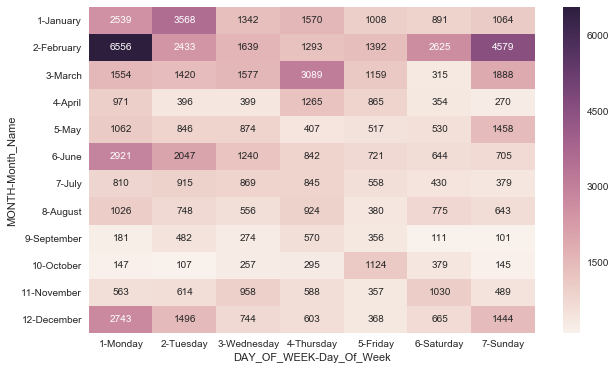

In [4]:
#Monthly by Weekday Cancellations

M_x_DOW = flights_c.pivot_table(index=['MONTH','Month_Name'], columns=['DAY_OF_WEEK','Day_Of_Week'], values='CANCELLED',aggfunc=sum)


#Heatmap for above table

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(M_x_DOW, annot=True, fmt=".0f")


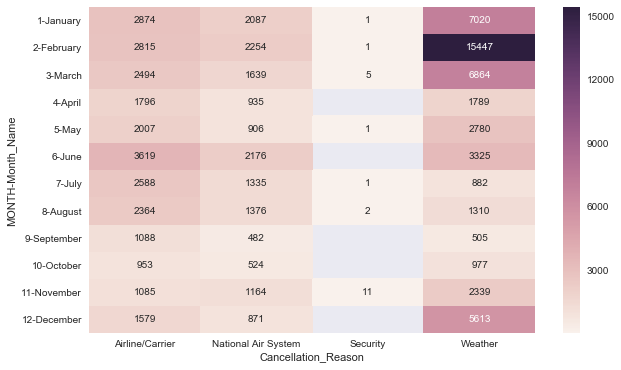

In [5]:
M_x_CAN = flights_c.pivot_table(index=['MONTH','Month_Name'], columns=['Cancellation_Reason'], values='CANCELLED',aggfunc=sum)

plt.figure(figsize = (10,6))

sns.heatmap(M_x_CAN, annot=True, fmt=".0f")


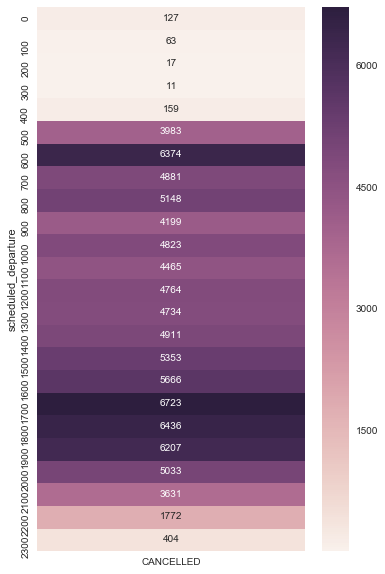

In [6]:
#Day by Hour Cancellations

T_x_CAN = flights.pivot_table(index=['scheduled_departure'], values='CANCELLED',aggfunc=sum)

T_x_CAN

#Heatmap for above table

plt.figure(figsize = (6,10))

sns.heatmap(T_x_CAN, annot=True, fmt=".0f")

In [10]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE_NAME',
       'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN', 'COUNTRY_ORIGIN',
       'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'AIRPORT_DESTINATION',
       'CITY_DESTINATION', 'STATE_DESTINATION', 'COUNTRY_DESTINATION',
       'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'Day_Of_Week',
       'Month_Name', 'Cancellation_Reason', 'scheduled_departure',
       'departure_time', 'scheduled_time', 'scheduled_arrival',
       'arrival_tim

In [25]:
monthly_delays = flights_ddelays.pivot_table(index=['MONTH','Month_Name'], values=['DEPARTURE_DELAY'])
monthly_delays

,,DEPARTURE_DELAY
MONTH,Month_Name,
1,January,32.623200
2,February,33.960667
3,March,31.354685
4,April,30.690080
5,May,33.704052
6,June,37.546367
7,July,34.204261
8,August,33.326425
9,September,28.099939


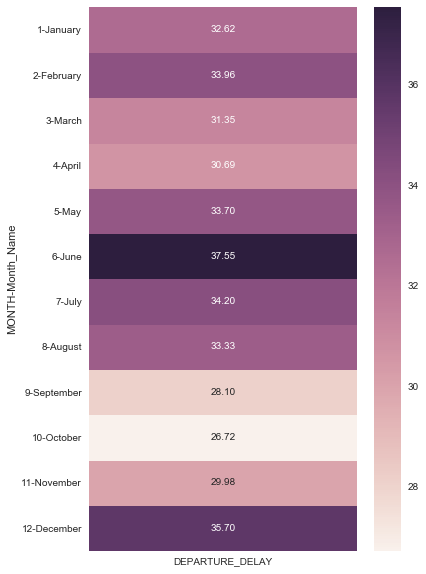

In [39]:
#months with average departure delay times

M_x_DDelay = flights_ddelays.pivot_table(index=['MONTH','Month_Name'], values=['DEPARTURE_DELAY'])

#Heatmap for above tables

plt.figure(figsize = (6,10))
sns.heatmap(M_x_DDelay, annot=True, fmt=".2f")


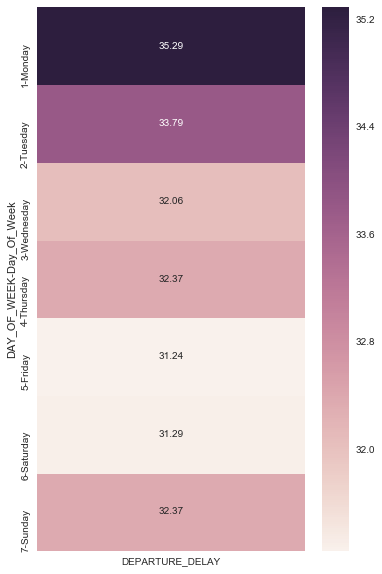

In [40]:
#days of the week with average delay time

D_x_DDelay = flights_ddelays.pivot_table(index=['DAY_OF_WEEK','Day_Of_Week'], values=['DEPARTURE_DELAY'])

plt.figure(figsize = (6,10))
sns.heatmap(D_x_DDelay, annot=True, fmt=".2f")

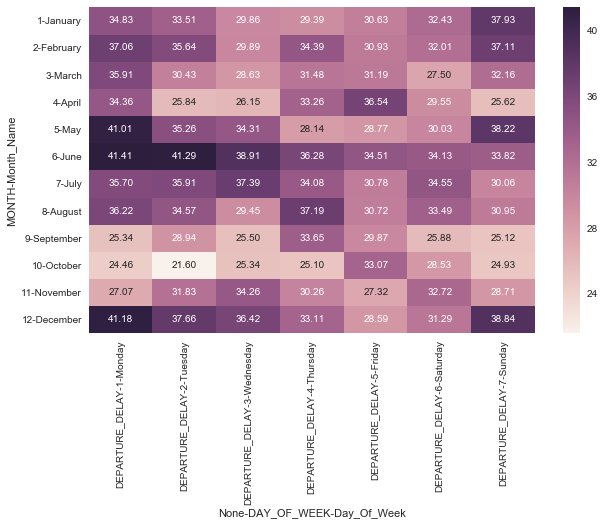

In [41]:
#month by day with average delay times
MD_x_DDelay = flights_ddelays.pivot_table(index=['MONTH','Month_Name'], columns=['DAY_OF_WEEK','Day_Of_Week'],values=['DEPARTURE_DELAY'])


plt.figure(figsize = (10,6))
sns.heatmap(MD_x_DDelay, annot=True, fmt=".2f")

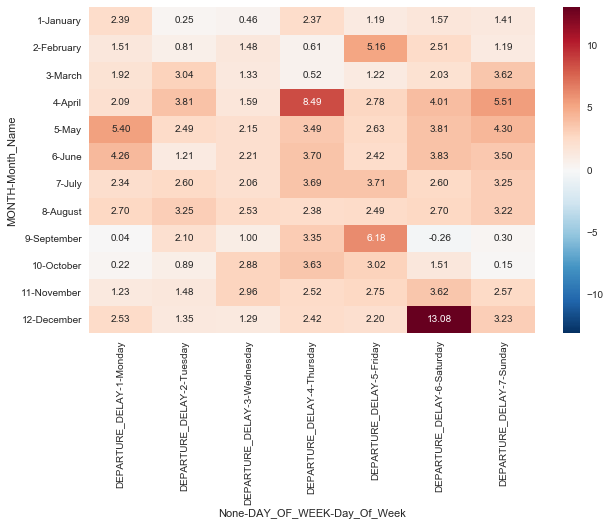

In [43]:
#month by day with average delay times -- including early departures (i.e. negative delays)
MD_x_C_Delay = flights_c.pivot_table(index=['MONTH','Month_Name'], 
                                     columns=['DAY_OF_WEEK','Day_Of_Week'],
                                     values=['DEPARTURE_DELAY'], aggfunc='mean')


plt.figure(figsize = (10,6))
sns.heatmap(MD_x_C_Delay, annot=True, fmt=".2f")

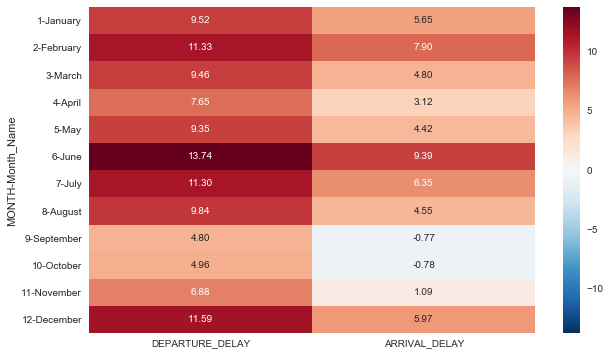

In [44]:
flights_month_delays = flights.groupby(['MONTH','Month_Name'])['DEPARTURE_DELAY','ARRIVAL_DELAY'].mean()

plt.figure(figsize = (10,6))
sns.heatmap(flights_month_delays, annot=True, fmt=".2f")

In [63]:
flights.groupby(['Scheduled Departure', 'Scheduled Arrival'])[ 'DEPARTURE_DELAY','ARRIVAL_DELAY'].mean()

DEPARTURE_DELAY  ARRIVAL_DELAY
Scheduled Departure Scheduled Arrival                                
00:00               00:00                     6.666667       2.666667
                    01:00                    11.165644       7.901840
                    02:00                    13.740157       7.763780
                    03:00                     9.776316      -1.618421
                    04:00                    15.197059      11.888235
                    05:00                     5.891160      -0.158329
                    06:00                     8.349566       0.235805
                    07:00                     7.297143       2.144000
                    08:00                     4.078694      -0.273336
                    09:00                    23.320513      16.679487
                    10:00                          NaN            NaN
                    11:00                          NaN            NaN
                    12:00                          NaN            NaN
                    13:00                          NaN            NaN
                    14:00                          NaN            NaN
                    15:00                          NaN            NaN
                    16:00                          NaN            NaN
                    17:00                          NaN            NaN
                    18:00                          NaN            NaN
                    19:00                          NaN            NaN
                    20:00                          NaN            NaN
                    21:00                          NaN            NaN
                    22:00                          NaN            NaN
                    23:00                          NaN            NaN
01:00               00:00                          NaN            NaN
                    01:00                          NaN            NaN
                    02:00                    51.000000       0.000000
                    03:00                     4.333333       9.000000
                    04:00                     2.559441       4.902098
                    05:00                    12.220010       6.320058
...                                                ...            ...
22:00               18:00                          NaN            NaN
                    19:00                          NaN            NaN
                    20:00                          NaN            NaN
                    21:00                     6.000000      -0.285714
                    22:00                    11.208886       7.122457
                    23:00                    12.248753       8.439246
23:00               00:00                    10.170194       5.635999
                    01:00                     7.196222       2.430220
                    02:00                     9.912621       3.304854
                    03:00                    14.912409       9.104380
                    04:00                     8.664514       2.731383
                    05:00                     9.181933       2.558540
                    06:00                     8.520511       1.109393
                    07:00                    10.260748       3.009229
                    08:00                     7.965048       0.896615
                    09:00                    -4.000000     -23.000000
                    10:00                          NaN            NaN
                    11:00                          NaN            NaN
                    12:00                          NaN            NaN
                    13:00                          NaN            NaN
                    14:00                          NaN            NaN
                    15:00                          NaN            NaN
                    16:00                          NaN            NaN
                    17:00                          NaN            NaN
                    18:00                        

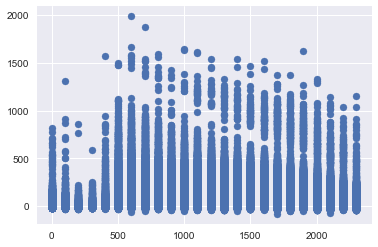

In [51]:
x = flights['scheduled_departure']
y = flights['DEPARTURE_DELAY']

# Generate and plot a random bivariate dataset

plt.scatter(x,y)
plt.show()

In [60]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE_NAME',
       'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN', 'COUNTRY_ORIGIN',
       'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'AIRPORT_DESTINATION',
       'CITY_DESTINATION', 'STATE_DESTINATION', 'COUNTRY_DESTINATION',
       'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'Day_Of_Week',
       'Month_Name', 'Cancellation_Reason', 'scheduled_departure',
       'departure_time', 'scheduled_time', 'scheduled_arrival', 'arrival_time',
   